In [3]:
import warnings
warnings.filterwarnings("ignore")

# for ml functions
from ml_utils import *

# for activation function
import tensorflow as tf

# Dataset Import and Overview

In [4]:
sinais_vitais_sem_label = pd.read_csv('treino_sinais_vitais_sem_label.txt', 
                                      header=None, 
                                      index_col=0, 
                                      names=['index','pSist','pDiast','qPA','pulso','resp','gravid'])

In [5]:
sinais_vitais_sem_label

,pSist,pDiast,qPA,pulso,resp,gravid
index,,,,,,
1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000
2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530426
3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730748
4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679910
5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375881
...,...,...,...,...,...,...
1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467
1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385014
1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530703


Shape: (1500, 6)
-----------------
pSist --> Type:num | Nas: 0(0%) | Min-Max: (0)-(21) | Possible PK
pDiast --> Type:num | Nas: 0(0%) | Min-Max: (0)-(14) | Possible PK
qPA --> Type:num | Nas: 0(0%) | Min-Max: (-8)-(8)
pulso --> Type:num | Nas: 0(0%) | Min-Max: (0)-(199) | Possible PK
resp --> Type:num | Nas: 0(0%) | Min-Max: (0)-(21) | Possible PK
gravid --> Type:num | Nas: 0(0%) | Min-Max: (13)-(87)


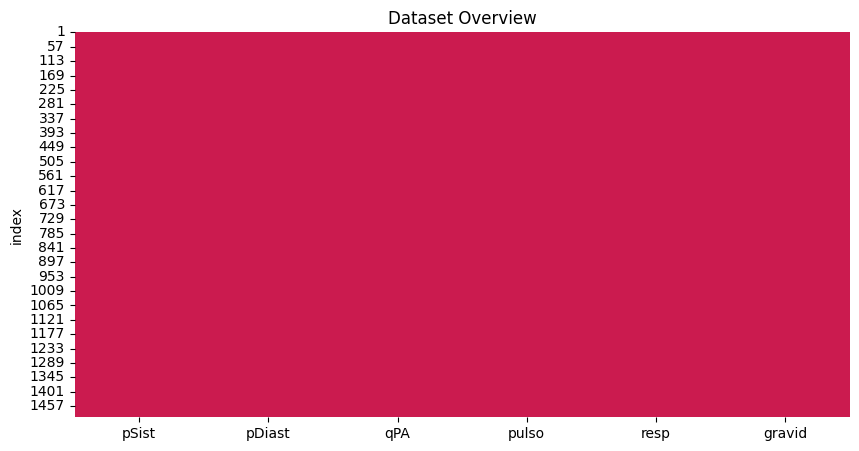

 Categorical   Numerical/DateTime   NaN 


In [7]:
dtf_overview(sinais_vitais_sem_label, max_cat=20, figsize=(10,5))

Text(0, 0.5, 'gravidade')

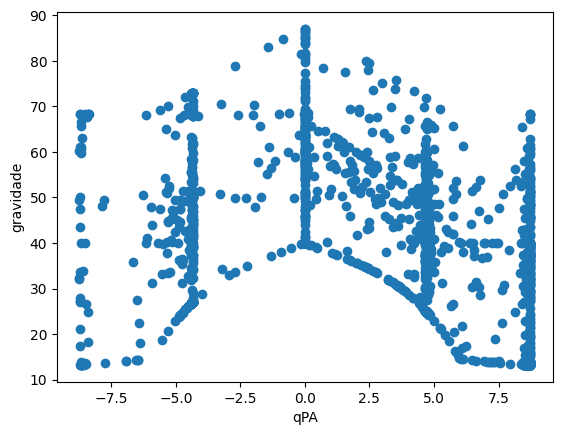

In [8]:
plot_sem_label = plt.scatter(sinais_vitais_sem_label['qPA'],sinais_vitais_sem_label['gravid'])
plt.xlabel('qPA')
plt.ylabel('gravidade')

Text(0, 0.5, 'gravidade')

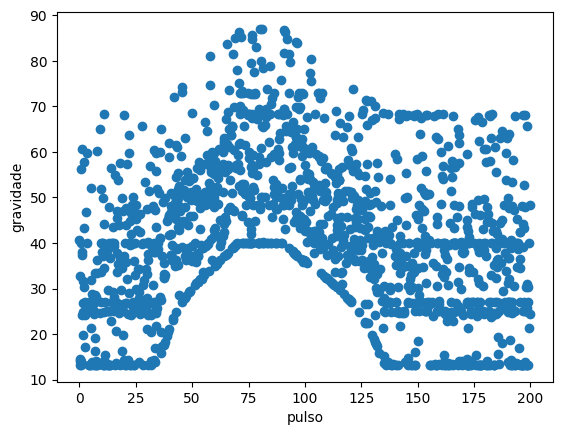

In [9]:
plot_sem_label = plt.scatter(sinais_vitais_sem_label['pulso'],sinais_vitais_sem_label['gravid'])
plt.xlabel('pulso')
plt.ylabel('gravidade')

Text(0, 0.5, 'gravidade')

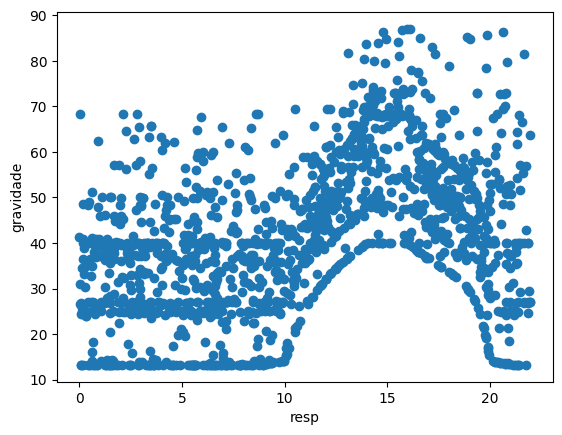

In [10]:
plot_sem_label = plt.scatter(sinais_vitais_sem_label['resp'],sinais_vitais_sem_label['gravid'])
plt.xlabel('resp')
plt.ylabel('gravidade')

In [11]:
sinais_vitais_com_label = pd.read_csv('treino_sinais_vitais_com_label.txt',
                                      header=None,
                                      index_col=0,
                                      names=['','pSist','pDiast','qPA','pulso','resp','gravid','classe'])

In [12]:
sinais_vitais_com_label

,pSist,pDiast,qPA,pulso,resp,gravid,classe
,,,,,,,
1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,2
2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530427,2
3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730745,3
4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679911,2
5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...,...
1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467,1
1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385011,3
1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530704,1


Text(0, 0.5, 'gravidade')

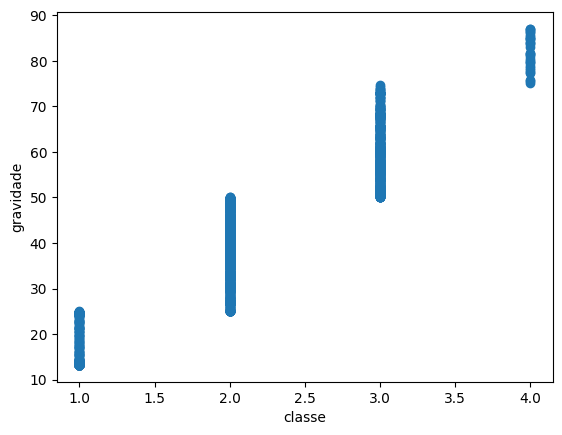

In [13]:
plot_com_label = plt.scatter(sinais_vitais_com_label['classe'],sinais_vitais_com_label['gravid'])
plt.xlabel('classe')
plt.ylabel('gravidade')

# Regression

## Build Perceptron (single layer neural network)

In [14]:
'''
Builds a Perceptron with the specified activation function
:parameter
    :param activation_function: str
:return
    perceptron
'''
def build_model_perceptron(activation_function):
    name = f"Perceptron-{activation_function}"
    # build the model
    perceptron = models.Sequential(name=name, layers=[
        ### single layer
        layers.Dense(
            name="l1",
            input_dim=3,
            units=1,
            activation=activation_function
        )
    ])
    perceptron.summary()
    return perceptron

In [15]:
# Create model relu
ptron_relu = build_model_perceptron('relu')

Model: "Perceptron-relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Create model sigmoid
ptron_sig = build_model_perceptron('sigmoid')

Model: "Perceptron-sigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


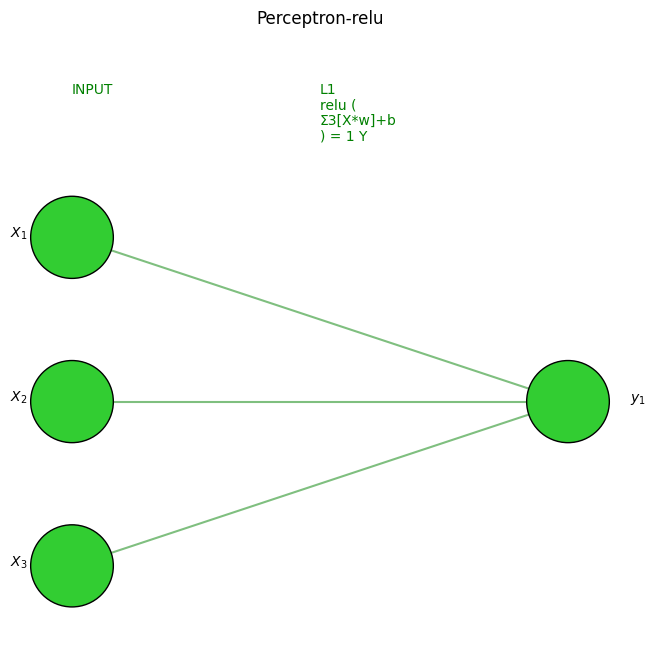

In [17]:
# Visualize the model architecture
visualize_nn(ptron_relu, description=True, figsize=(8,8))

In [19]:
# define x = [x1, x2, x3] and y
x_regre = sinais_vitais_sem_label.loc[:,['qPA','pulso','resp']]
y_regre = sinais_vitais_sem_label['gravid']

## Train/Validation Regression

In [20]:
# define metrics
def R2(y, y_hat):
    ss_res = K.sum(K.square(y - y_hat))
    ss_tot = K.sum(K.square(y - K.mean(y)))
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# how to define the optimizer, loss(cost)? what are metrics?
ptron_relu.compile(optimizer='adam', loss='mean_absolute_error',
                   metrics=[R2])

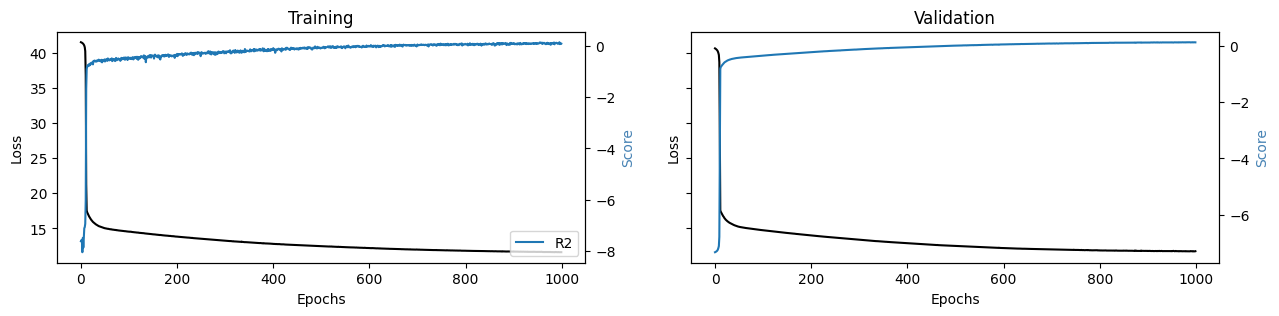

In [21]:
# train/validation
training = ptron_relu.fit(x=x_regre, y=y_regre, batch_size=16, epochs=1000, 
                     shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training plot
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation plot
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

## Train/Validation Classification

In [26]:
'''
Builds a Perceptron with the specified activation function
:parameter
    :param activation_function: str
:return
    perceptron
'''
def build_model_perceptron_2(activation_function):
    name = f"Perceptron-{activation_function}"
    # build the model
    perceptron = models.Sequential(name=name, layers=[
        ### single layer
        layers.Dense(
            name="l1",
            input_dim=1,
            units=1,
            activation=activation_function
        )
    ])
    perceptron.summary()
    return perceptron

In [28]:
# Create model relu
ptron_relu_2 = build_model_perceptron_2('relu')

Model: "Perceptron-relu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# define x = [x1, x2, x3] and y
x_class = sinais_vitais_com_label['gravid']
y_class = sinais_vitais_com_label['classe']

In [43]:
#sinais_vitais_com_label['gravid']
sinais_vitais_com_label['classe']


1       2
2       2
3       3
4       2
5       3
       ..
1496    1
1497    3
1498    1
1499    3
1500    2
Name: classe, Length: 1500, dtype: int64

In [31]:
# define metrics for CLASSIFICATION
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
ptron_relu_2.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

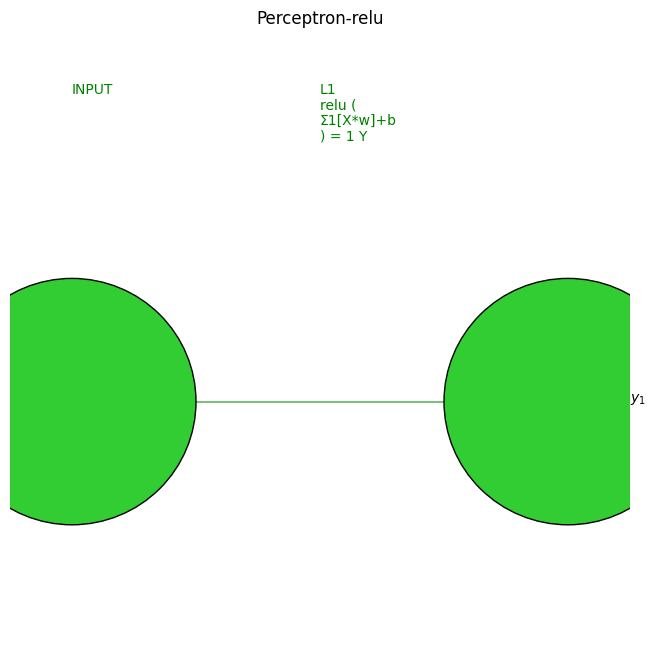

In [41]:
# Visualize the model architecture
visualize_nn(ptron_relu_2, description=True, figsize=(8,8))

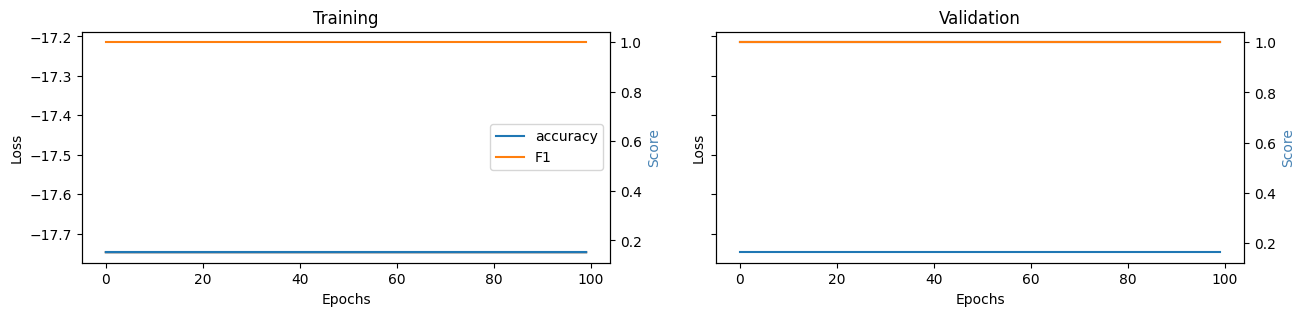

In [32]:
# train/validation
training = ptron_relu_2.fit(x=x_class, y=y_class, batch_size=16, epochs=100, 
                            shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training plot
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation plot
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

## Misc code i don't know what to do with yet

In [106]:
# define metrics for CLASSIFICATION
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy',F1])

In [108]:
# define metrics for REGRESSION
def R2(y, y_hat):
    ss_res = K.sum(K.square(y - y_hat))
    ss_tot = K.sum(K.square(y - K.mean(y)))
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error',
              metrics=[R2])

In [104]:
X = np.random.rand(1000,10)
y = np.random.choice([1,0], size=1000)

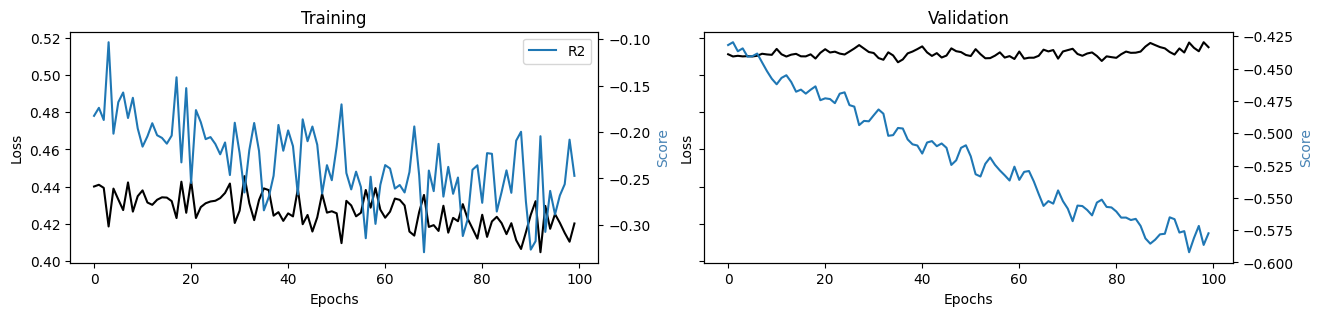

In [111]:
# train/validation
training = model.fit(x=X, y=y, batch_size=32, epochs=100, 
                     shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation
ax[1].set(title="Validation")
ax22 = ax[1].twinx()
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')
for metric in metrics:
    ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")
plt.show()

In [55]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)),
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)),
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


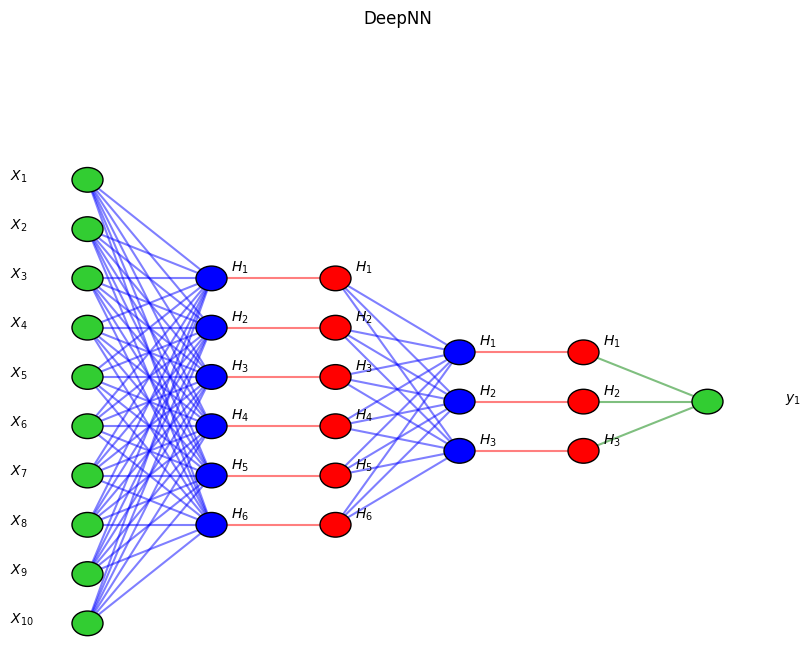

In [56]:
visualize_nn(model)

In [18]:
# show feature contribution with shap
i = 1

explainer_shap(model,
               X_names=list_feature_names,
               X_instance=X[i],
               X_train=X,
               task="classification", #task="regression"
               top=10)

NameError: name 'list_feature_names' is not defined